# Import Necessary Libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

# Load the Data

In [2]:
#loading the datset
df= pd.read_csv('Recruitment_Data.csv')
df

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online


# Check the structure of data

In [3]:
# checking the top 5 rows
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [4]:
# checking the last 5 rows
df.tail()

,attrition,performance_rating,sales_quota_pct,recruiting_source
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online
445,0,2,0.582642,NaN


In [5]:
# checking total number of rows and columns
df.shape

(446, 4)

In [6]:
# checking info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [7]:
# checking the statistics of data frame
df.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


# Data values and missing values

In [8]:
# checking percentage of missing values in each columns
100*df.isnull().mean()

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     45.964126
dtype: float64

In [9]:
# Check column names
print(df.columns)

Index(['attrition', 'performance_rating', 'sales_quota_pct',
       'recruiting_source'],
      dtype='object')


In [10]:
# Prints the number of missing values in the 'recruiting_source' column
print(df['recruiting_source'].isnull().sum())

205


In [11]:
# Drops rows where 'recruiting_source' has missing values and updates the dataframe in place
df.dropna(subset=['recruiting_source'], inplace=True)

In [12]:
# checking total no of rows and columns after removing high missing columns
df.shape

(241, 4)

In [13]:
# Recruiting Source Distribution
recruiting_source_distribution = df['recruiting_source'].value_counts()

# Displaying the distribution
print(recruiting_source_distribution)

recruiting_source
Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: count, dtype: int64


# Grouped Analysis by Recruiting Source

In [14]:
# Grouping by 'recruiting_source' and calculating the average sales_quota_pct and attrition
average_sales_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean()
average_attrition_by_source = df.groupby('recruiting_source')['attrition'].mean()

# Printing the results
print("Average Sales Quota Percentage by Recruiting Source:")
print(average_sales_by_source)

print("\nAverage Attrition by Recruiting Source:")
print(average_attrition_by_source)

Average Sales Quota Percentage by Recruiting Source:
recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64

Average Attrition by Recruiting Source:
recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64


Interpretation:
Average Sales Quota Percentage: This gives the average percentage of sales quota achieved by employees recruited from different sources.
Average Attrition: This shows the percentage of employees who left the organization, grouped by their recruiting source.

# Bivariate Analysis

a) Bivariate Analysis for Numerical vs Numerical Data (Correlation & Scatter Plot):
To understand the relationship between two numerical variables, you can use scatter plots and correlation coefficients.

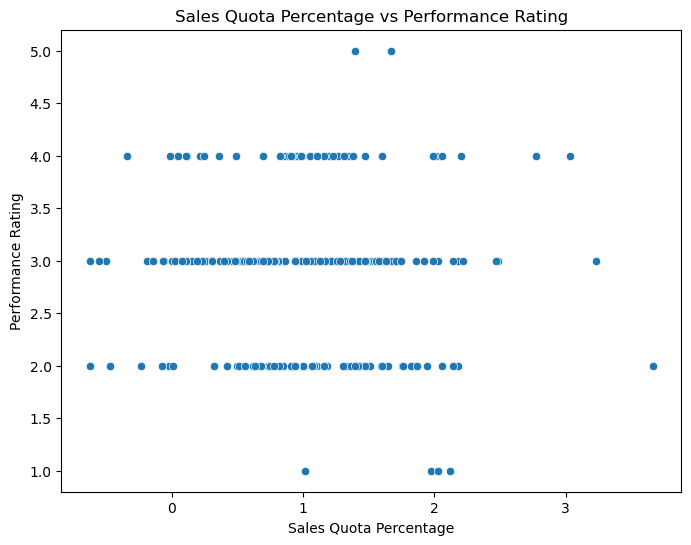

Correlation between Sales Quota and Performance Rating: -0.07


In [15]:
# Scatter plot for 'sales_quota_pct' vs 'performance_rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sales_quota_pct', y='performance_rating', data=df)
plt.title('Sales Quota Percentage vs Performance Rating')
plt.xlabel('Sales Quota Percentage')
plt.ylabel('Performance Rating')
plt.show()

# Calculate the correlation coefficient
corr = df['sales_quota_pct'].corr(df['performance_rating'])
print(f"Correlation between Sales Quota and Performance Rating: {corr:.2f}")

b) Bivariate Analysis for Categorical vs Numerical Data (Box Plot)
To explore the relationship between a categorical variable and a numerical variable, you can use box plots.

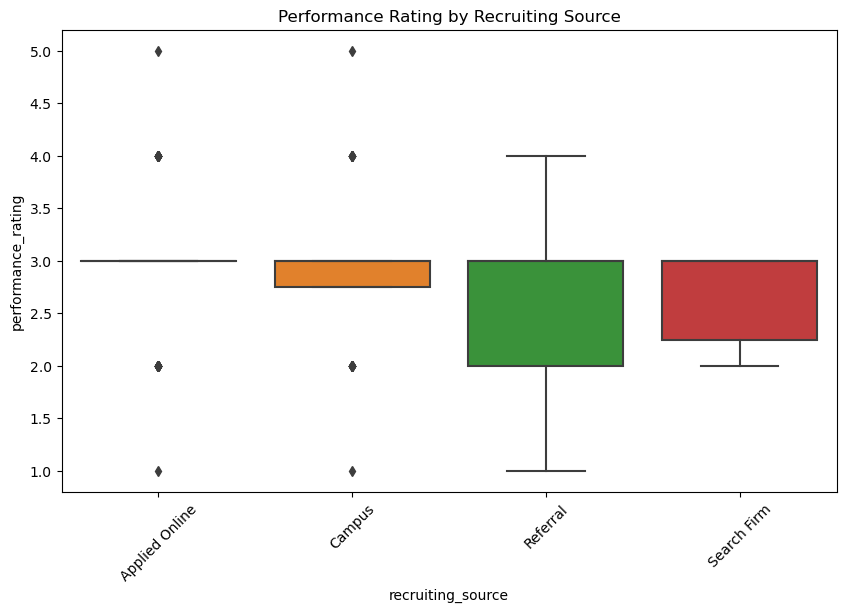

In [16]:
# Box plot to analyze 'recruiting_source' and 'performance_rating'
plt.figure(figsize=(10,6))
sns.boxplot(x='recruiting_source', y='performance_rating', data=df)
plt.title('Performance Rating by Recruiting Source')
plt.xticks(rotation=45)
plt.show()

Campus and Search Firm recruits have more consistent performance, while Applied Online and Referral recruits show more variability.

c) Bivariate Analysis for Categorical vs Categorical Data (Cross-tabulation)
For two categorical variables, cross-tabulation can be useful.

In [17]:
# Cross-tabulation between 'recruiting_source' and 'attrition'
cross_tab = pd.crosstab(df['recruiting_source'], df['attrition'])
print(cross_tab)

attrition           0   1
recruiting_source        
Applied Online     98  32
Campus             40  16
Referral           30  15
Search Firm         5   5


# Multivariate Analysis

Multivariate analysis involves analyzing more than two variables simultaneously. A popular method is using pair plots or heatmaps for correlation.

a) Pair Plot
A pair plot visualizes the pairwise relationships between several variables.

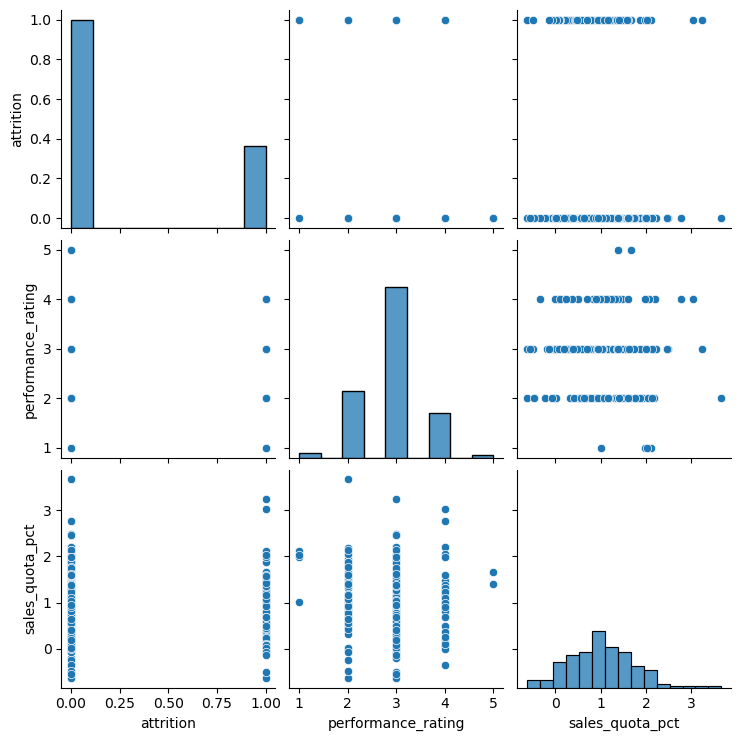

In [18]:
# Pair plot for numerical variables
sns.pairplot(df[['attrition', 'performance_rating', 'sales_quota_pct']])
plt.show()

The pair plot shows weak relationships between the variables, with no strong linear correlations observed. Attrition appears to be mostly independent of both performance rating and sales quota percentage.

b) Correlation Heatmap (for Multivariate Analysis of Numerical Variables)

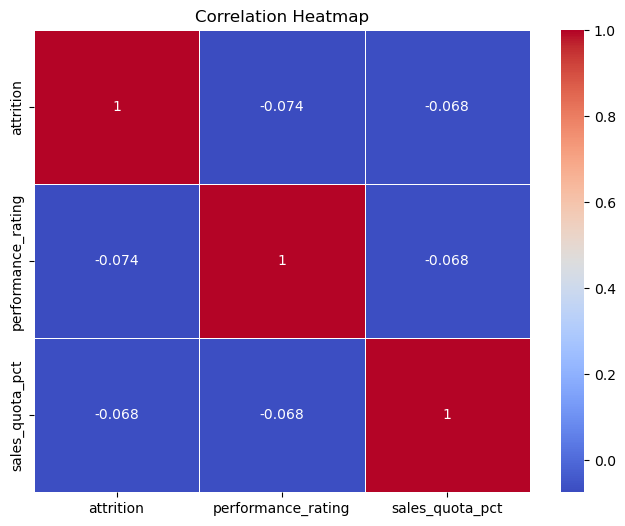

In [19]:
# Heatmap for the correlation matrix
correlation_matrix = df[['attrition', 'performance_rating', 'sales_quota_pct']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows weak negative correlations between attrition and both performance rating (-0.074) and sales quota percentage (-0.068). None of the variables exhibit strong correlations with each other, indicating minimal linear relationships.

# Outlier Detection Using Box Plot

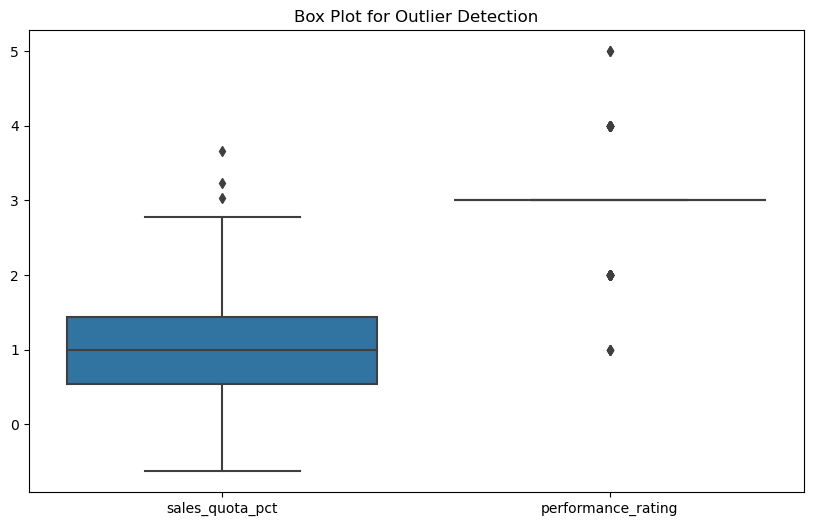

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting box plots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sales_quota_pct', 'performance_rating']])
plt.title('Box Plot for Outlier Detection')
plt.show()

The box plot shows several outliers for both sales_quota_pct and performance_rating, with performance rating having a larger spread of outliers. The majority of sales quota percentage data is concentrated between 0.5 and 2, while performance ratings display less variability.

# Outlier Treatment

In [21]:
import pandas as pd
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df['sales_quota_pct'])
outliers = df[(z_scores > 3) | (z_scores < -3)]

print("Outliers based on Z-score:")
print(outliers)

Outliers based on Z-score:
     attrition  performance_rating  sales_quota_pct recruiting_source
166          0                   2         3.666740          Referral
372          1                   3         3.234486            Campus


# Conclusion

1.Recruiting Source Analysis:
Campus and Search Firm recruits show consistent performance with fewer outliers.
Applied Online and Referral recruits exhibit more variability, indicating inconsistent quality.

2.Sales Performance and Attrition Trends:
Applied Online recruits have the highest average sales quota percentage (1.06).
Search Firm recruits have the lowest sales quota percentage (0.89) and the highest attrition rate (50%).
Referral sources follow with an attrition rate of 33.33%.
Targeted strategies are needed to improve recruitment and retention for Search Firm and Referral sources.

3.Attrition & Performance Relationship:
Weak negative correlations exist between attrition and performance rating (-0.074) and sales quota percentage (-0.068), indicating little connection between performance and likelihood to leave.

4.Sales Quota & Performance:
No clear relationship between sales quota achievement and performance ratings, with most employees rated around 3.

5.Outliers:
Significant outliers in sales quotas and performance ratings may distort overall trends, suggesting a need for careful handling in future analyses